In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
#한글 폰트 안깨지게 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

### Load data

In [41]:
from datetime import datetime
# train, test 분리
data = pd.read_csv('../data/data.csv', encoding='cp949')

for i in range(len(data)):
    data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')

# 'Date' 열을 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

train = data[:int(len(data)*0.9)]
test = data[int(len(data)*0.9):]
y_train = train[['주택매매가격지수']]
y_test = test[['주택매매가격지수']]
X_train = train.drop(columns=['주택매매가격지수'], axis=1)
X_test = test.drop(columns=['주택매매가격지수'], axis=1)

from sklearn.preprocessing import MinMaxScaler
mm_X_train = MinMaxScaler()
X_train_sc = mm_X_train.fit_transform(X_train)
mm_y_train = MinMaxScaler()
y_train_sc = mm_y_train.fit_transform(y_train)

mm_X_test = MinMaxScaler()
X_test_sc = mm_X_test.fit_transform(X_test)
mm_y_test = MinMaxScaler()
y_test_sc = mm_y_test.fit_transform(y_test)

X_train_sc = pd.DataFrame(X_train_sc, index=X_train.index)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc, index=X_test.index)
X_test_sc.columns = X_test.columns

y_train_sc = pd.DataFrame(y_train_sc, index=y_train.index)
y_train_sc.columns = y_train.columns

y_test_sc = pd.DataFrame(y_test_sc, index=y_test.index)
y_test_sc.columns = y_test.columns

X = pd.concat([X_train_sc, X_test_sc])

C:\Users\장희중학부재학통계학과\AppData\Local\Temp\ipykernel_21600\914285299.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')


In [46]:
train_total = pd.read_csv('../data/train_total.csv')
# 'Date' 열을 인덱스로 설정
train_total['Date'] = pd.to_datetime(train_total['Date'])
train_total.set_index('Date', inplace=True)

### DFM

In [43]:
# 최적의 factor개수와 차수 고르기
"""
# Define the range of values for n_factors and factor_order
n_factors_range = [1, 2, 3, 4, 5]
factor_order_range = [2, 3, 4, 5]

best_aic = np.inf
best_params = None

endog = train_total

# Perform grid search
for n_factors in n_factors_range:
    for factor_order in factor_order_range:
        # Create and fit the DFM model
        dfm = DynamicFactor(endog=endog, k_factors=n_factors, factor_order=factor_order, enforce_stationarity=True)
        dfm_results = dfm.fit(maxiter=500)

        # Get AIC for the current model
        current_aic = dfm_results.aic

        # Update the best parameters if the current model has a lower AIC
        if current_aic < best_aic:
            best_aic = current_aic
            best_params = {'n_factors': n_factors, 'factor_order': factor_order}

# Print the best parameters
print(f"Best parameters: {best_params}")
# maxiter=500 일 때, n_factors=1, factor_order=2

"""

'\n# Define the range of values for n_factors and factor_order\nn_factors_range = [1, 2, 3, 4, 5]\nfactor_order_range = [2, 3, 4, 5]\n\nbest_aic = np.inf\nbest_params = None\n\nendog = train_total\n\n# Perform grid search\nfor n_factors in n_factors_range:\n    for factor_order in factor_order_range:\n        # Create and fit the DFM model\n        dfm = DynamicFactor(endog=endog, k_factors=n_factors, factor_order=factor_order, enforce_stationarity=True)\n        dfm_results = dfm.fit(maxiter=500)\n\n        # Get AIC for the current model\n        current_aic = dfm_results.aic\n\n        # Update the best parameters if the current model has a lower AIC\n        if current_aic < best_aic:\n            best_aic = current_aic\n            best_params = {\'n_factors\': n_factors, \'factor_order\': factor_order}\n\n# Print the best parameters\nprint(f"Best parameters: {best_params}")\n# maxiter=500 일 때, n_factors=1, factor_order=2\n\n'

In [48]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

endog = train_total
exog = X_train_sc[['기준금리']]

# DFM 모델 정의
n_factors = 1
dfm = DynamicFactor(endog=endog, exog = exog, k_factors=n_factors, factor_order=2, enforce_stationarity=True, error_order=2)

dfm_results = dfm.fit(maxiter=500)

c:\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
dfm_results.summary()

Dep. Variable:,"['건설업_pc1', '부동산 시장_pc1', '채권금리_pc1', '주식시장_pc1', '물가_pc1', '경제_pc1', '주택전세가격지수', '주택 거래량', '주택매매가격지수']",No. Observations:,116
Model:,"DynamicFactor(factors=1, order=2)",Log Likelihood,1184.918
,+ 1 regressors,AIC,-2275.836
,+ AR(2) errors,BIC,-2146.417
Date:,"Sat, 16 Mar 2024",HQIC,-2223.299
Time:,14:18:54,,
Sample:,01-01-2013,,
,- 08-01-2022,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"4.91, 3.30, 5.11, 3.04, 0.06, 0.37, 2.96, 5.88, 0.05",Jarque-Bera (JB):,"11.88, 14.82, 39.23, 24.94, 47.87, 26.38, 6.61, 11.80, 231.98"
Prob(Q):,"0.03, 0.07, 0.02, 0.08, 0.80, 0.54, 0.09, 0.02, 0.83",Prob(JB):,"0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.04, 0.00, 0.00"


In [49]:
dfm_results.params

loading.f1.건설업_pc1                1.578913
loading.f1.부동산 시장_pc1            -2.278861
loading.f1.채권금리_pc1              -1.319872
loading.f1.주식시장_pc1               2.597741
loading.f1.물가_pc1                 2.136160
loading.f1.경제_pc1                 2.891754
loading.f1.주택전세가격지수               0.056791
loading.f1.주택 거래량                 0.502135
loading.f1.주택매매가격지수              -0.012129
beta.기준금리.건설업_pc1                -0.312521
beta.기준금리.부동산 시장_pc1             -0.132218
beta.기준금리.채권금리_pc1                0.057205
beta.기준금리.주식시장_pc1               -0.144694
beta.기준금리.물가_pc1                  0.637926
beta.기준금리.경제_pc1                 -0.231449
beta.기준금리.주택전세가격지수                0.009926
beta.기준금리.주택 거래량                 -0.612259
beta.기준금리.주택매매가격지수               -0.002748
sigma2.건설업_pc1                    0.036123
sigma2.부동산 시장_pc1                 0.000279
sigma2.채권금리_pc1                   0.010022
sigma2.주식시장_pc1                   0.011711
sigma2.물가_pc1                     0.002157
sigma2.경제_p

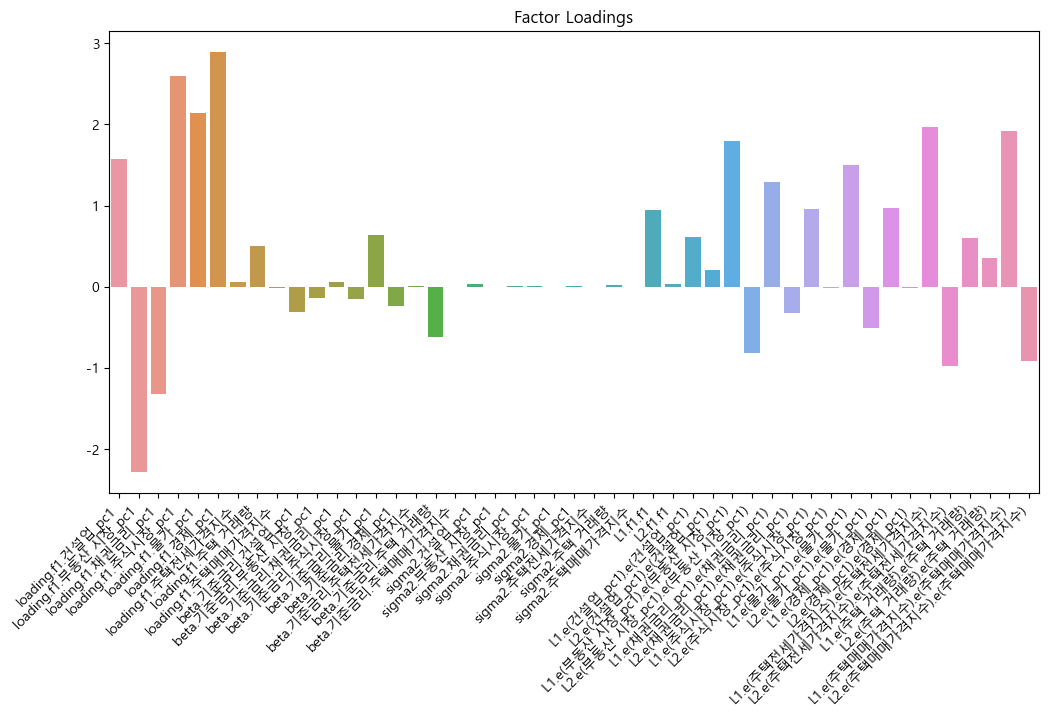

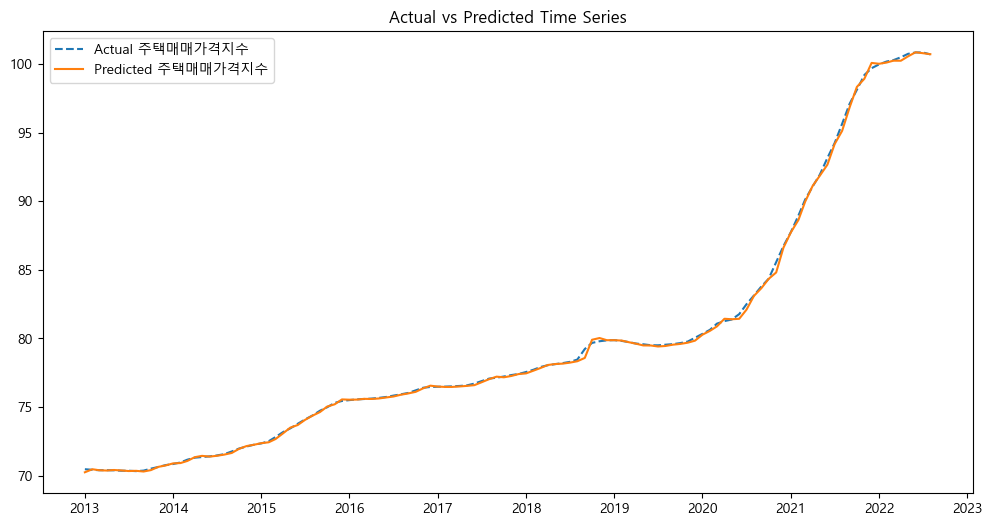

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract factor loadings from the results
factor_loadings = dfm_results.params

# Plot factor loadings
plt.figure(figsize=(12, 6))
sns.barplot(x=factor_loadings.index, y=factor_loadings.values)
plt.title('Factor Loadings')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot time series of dependent variables and predicted values
fig, ax = plt.subplots(figsize=(12, 6))
y_pred = mm_y_train.inverse_transform(dfm_results.predict()[['주택매매가격지수']])
y_pred = pd.DataFrame(y_pred, index = y_train.index)
y_pred.columns = y_train.columns
for i, variable in enumerate(['주택매매가격지수']):
    ax.plot(y_train.index, y_train[variable], label=f'Actual {variable}', linestyle='--')
    ax.plot(y_train.index, y_pred[variable], label=f'Predicted {variable}')

ax.set_title('Actual vs Predicted Time Series')
ax.legend()
plt.show()


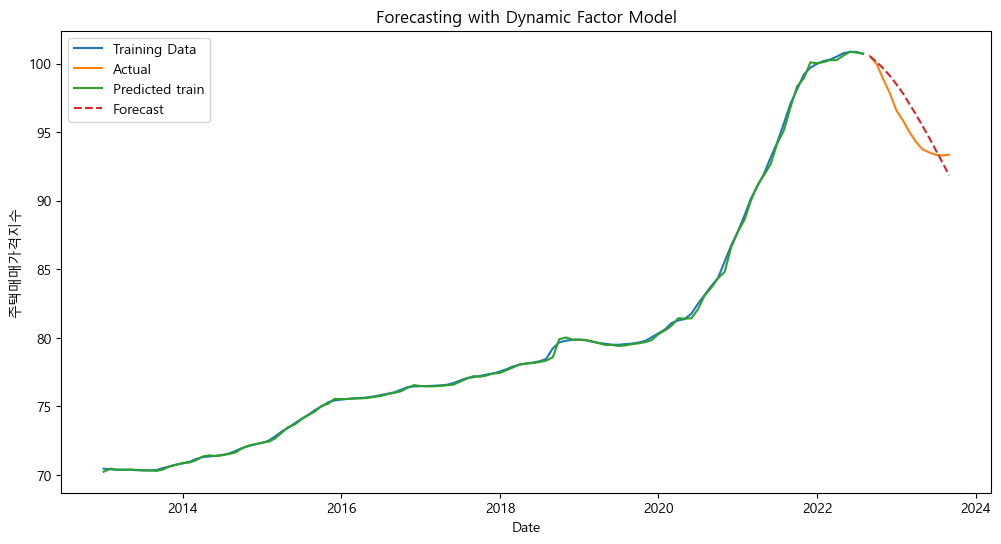

In [51]:
# Number of periods to forecast
forecast_periods = 13
exog_test = X_test_sc[['기준금리']]

# Get the prediction and forecast
dfm_forecast = dfm_results.get_forecast(exog = exog_test, steps=forecast_periods)

# Extract predicted values
y_pred_forecast = dfm_forecast.predicted_mean[['주택매매가격지수']]

# Inverse transform the predicted values to the original scale
y_pred_forecast_original = mm_y_train.inverse_transform(y_pred_forecast)

# Create a DataFrame for the forecast values
forecast_index = pd.date_range(start=y_train.index[-1], periods=forecast_periods + 1, freq='MS')[1:]
y_pred_forecast_df = pd.DataFrame(y_pred_forecast_original, index=forecast_index, columns=['주택매매가격지수'])

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train['주택매매가격지수'], label='Training Data', linestyle='-')
plt.plot(y_test.index, y_test['주택매매가격지수'], label='Actual', linestyle = '-')
plt.plot(y_train.index, y_pred['주택매매가격지수'], label=f'Predicted train', linestyle = '-')
plt.plot(y_pred_forecast_df.index, y_pred_forecast_df['주택매매가격지수'], label='Forecast', linestyle='--')
plt.title('Forecasting with Dynamic Factor Model')
plt.xlabel('Date')
plt.ylabel('주택매매가격지수')
plt.legend()
plt.show()


In [52]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(y_pred['주택매매가격지수'], y_train['주택매매가격지수'])**0.5
print('Train RMSE:', train_rmse)
test_rmse = mean_squared_error(y_test, y_pred_forecast_df)**0.5
print('Test RMSE:', test_rmse)

Train RMSE: 0.1595760172596738
Test RMSE: 1.3766420326301854


In [53]:
df_compare = pd.concat([y_test, y_pred_forecast_df], axis=1)
df_compare.columns = ['실제 주택매매가겨지수', '예측 매매가격지수']
df_compare

,실제 주택매매가겨지수,예측 매매가격지수
2022-09-01,100.568,100.550085
2022-10-01,100.014,100.151433
2022-11-01,98.909,99.679487
2022-12-01,97.894,99.143928
2023-01-01,96.612,98.512009
2023-02-01,95.848,97.834469
2023-03-01,95.054,97.098643
2023-04-01,94.316,96.312402
2023-05-01,93.766,95.483177
2023-06-01,93.536,94.617957
